In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# importer les fichiers

In [3]:
## visualisation des données sous forme de dataframe
origines= pd.read_csv("data/origine.csv.csv")
analyses_bioch = pd.read_csv("data/ags.csv.csv")

In [4]:
origines.head()

,nom,origine
0,AP01,AP
1,AP02,AP
2,AP03,AP
3,AP04,AP
4,AP05,AP


In [5]:
analyses_bioch.head()

,,C16:0,C16:1w9,C16:1w7,C17:0,C17:1w8,C18:0,C18:1w9,C18:1w7,C18:2w6,C18:3w3,C20:0,C20:1w9,C22:0,C24:0,Squalene
0,AP01,13.22,0.10,1.01,0.06,0.11,2.03,71.06,2.61,8.37,0.69,0.34,0.24,0.11,0.05,0.65
1,AP02,14.32,0.12,1.06,0.09,0.16,2.34,67.34,2.51,10.74,0.55,0.38,0.22,0.11,0.05,0.59
2,AP03,14.00,0.12,1.06,0.10,0.17,2.24,68.13,2.56,10.33,0.56,0.36,0.21,0.11,0.05,0.62
3,AP04,13.84,0.11,0.90,0.08,0.14,2.38,67.67,2.29,11.28,0.57,0.37,0.20,0.11,0.06,0.58
4,AP05,13.69,0.12,1.03,0.12,0.21,2.40,68.92,2.51,9.69,0.55,0.38,0.21,0.12,0.05,0.60


### 1 Réaliser une boite à moustaches sur les données de l'analyses biologiques 

Text(0.5, 1.0, "boite à moustaches de l'analysees biochimiques")

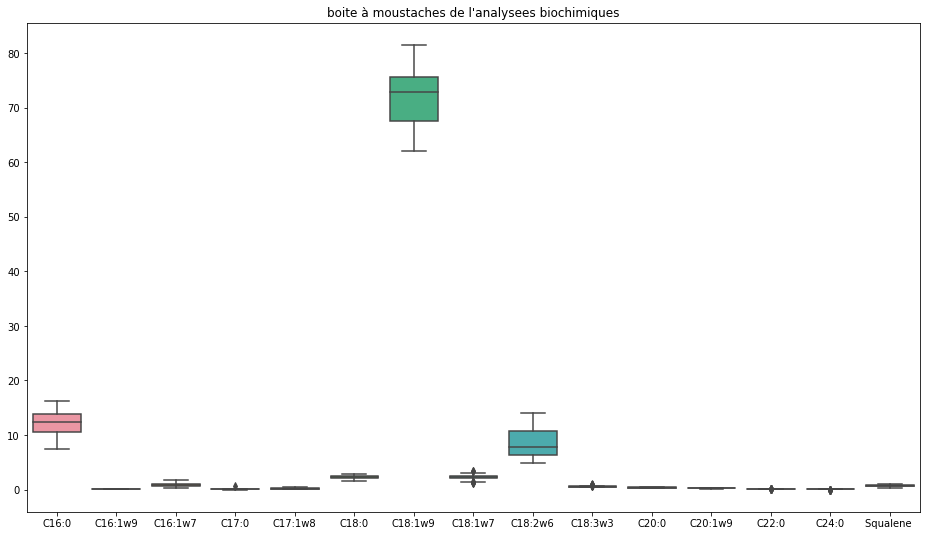

In [6]:
plt.figure(figsize=(16,9))
sns.boxplot(data = analyses_bioch)
plt.title("boite à moustaches de l'analysees biochimiques")

#### Conclusion :
Que peut-on dire de la dispersion des donnees ? Qu’en deduisez-vous pour le choix des options
de centrage et normalisation d’une analyse en composantes principales ?
- On remarque qu'il existe une différence entre les grandeurs de chaque variables. (dispersion des variables)
- Pour la suite on va réaliser un centrage et une normalisation 

In [7]:
## utilision standardscaler de scikit learn pour centrer et reduit 
pca_data = analyses_bioch.drop('  ',axis=1)
scaler = StandardScaler()
scaler.fit(pca_data) ## centrage et reduction des donnés 
scaler.transform(pca_data)

array([[ 0.51532792, -1.1206955 ,  0.5096673 , ..., -0.4051994 ,
        -0.15021234, -0.3503962 ],
       [ 1.01991167, -0.05146051,  0.68058005, ..., -0.4051994 ,
        -0.15021234, -0.77267819],
       [ 0.87312367, -0.05146051,  0.68058005, ..., -0.4051994 ,
        -0.15021234, -0.5615372 ],
       ...,
       [ 0.90982067, -0.58607801,  0.8514928 , ...,  1.33669226,
         0.85299153,  0.70530879],
       [ 1.07954429, -1.1206955 ,  1.09077065, ...,  1.33669226,
         1.8561954 ,  0.63492845],
       [ 0.7125743 , -0.05146051,  0.47548475, ...,  1.33669226,
         1.8561954 ,  0.42378746]])

In [8]:
## visualisons la boite à moustaches à nouveaux
analyses_bioch_standard = analyses_bioch.drop('  ',axis=1)
analyses_bioch_standard [analyses_bioch_standard.columns] =  scaler.transform(pca_data)
analyses_bioch_standard.head()

,C16:0,C16:1w9,C16:1w7,C17:0,C17:1w8,C18:0,C18:1w9,C18:1w7,C18:2w6,C18:3w3,C20:0,C20:1w9,C22:0,C24:0,Squalene
0,0.515328,-1.120696,0.509667,-0.565392,-0.663105,-1.265076,-0.187163,0.787054,-0.085529,1.116621,-1.274918,-0.507311,-0.405199,-0.150212,-0.350396
1,1.019912,-0.051461,0.680580,-0.091982,-0.120670,-0.040557,-0.911088,0.544264,0.842843,-0.530316,-0.169891,-0.962310,-0.405199,-0.150212,-0.772678
2,0.873124,-0.051461,0.680580,0.065822,-0.012183,-0.435563,-0.757351,0.665659,0.682238,-0.412678,-0.722404,-1.189809,-0.405199,-0.150212,-0.561537
3,0.799730,-0.586078,0.133659,-0.249785,-0.337644,0.117446,-0.846869,0.010127,1.054370,-0.295040,-0.446147,-1.417309,-0.405199,0.852992,-0.843059
4,0.730923,-0.051461,0.578032,0.381428,0.421765,0.196447,-0.603615,0.544264,0.431539,-0.530316,-0.169891,-1.189809,0.465746,-0.150212,-0.702298


Text(0.5, 1.0, "boite à moustaches de l'analysees biochimiques après normalisation ")

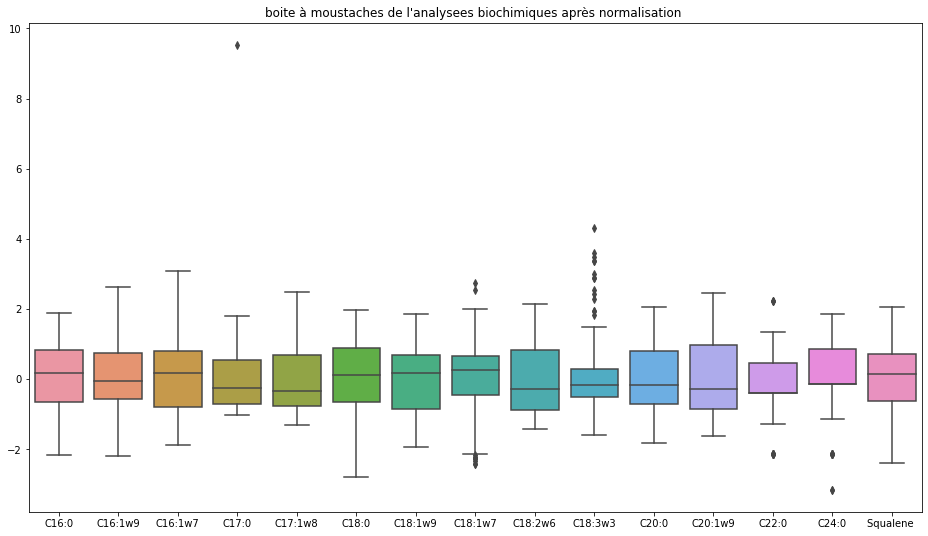

In [9]:
plt.figure(figsize=(16,9))
sns.boxplot(data = analyses_bioch_standard)
plt.title("boite à moustaches de l'analysees biochimiques après normalisation ")

### 2 Réalisation de l'ACP


In [10]:
pca = PCA( )
X = analyses_bioch_standard.values
pca = pca.fit(X)
explained_variance = pca.explained_variance_ratio_ ## variance expliqué par l'ACP
score = pca.transform(X)
score

array([[-5.82253477e-01,  1.58816976e+00, -1.41064921e+00, ...,
        -1.67206733e-02, -1.20382976e-01,  5.66146893e-04],
       [-1.61744881e+00,  7.09673093e-01, -2.13630919e-02, ...,
        -2.63903873e-01, -3.74418556e-02,  1.45272413e-03],
       [-1.47589849e+00,  1.27553128e+00,  1.23865702e-01, ...,
        -1.14611796e-01, -5.50469654e-02,  8.19071715e-04],
       ...,
       [-2.98434324e+00, -1.94280247e+00, -7.03311313e-01, ...,
         1.08104485e-01, -7.45686870e-02, -1.70915057e-03],
       [-3.64365192e+00, -1.56200644e+00, -7.70707899e-01, ...,
         2.91971208e-01,  6.43199020e-02, -3.09089759e-03],
       [-2.68852742e+00, -2.54172888e+00, -4.94088706e-01, ...,
         7.88056118e-02, -9.38641980e-02, -1.88149051e-03]])

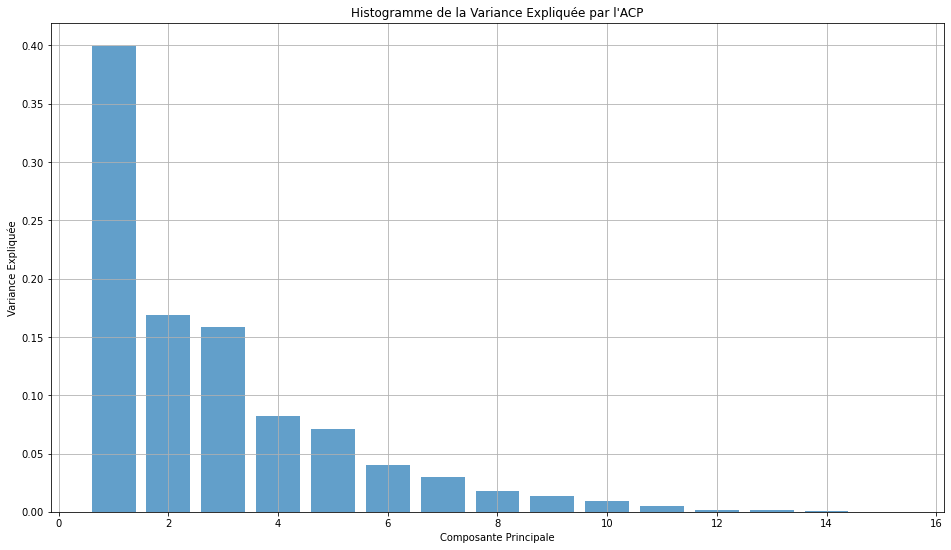

In [11]:
### visualisation de la variance expliquée par l'ACP
plt.figure(figsize=(16,9))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, align='center', alpha=0.7)
plt.title('Histogramme de la Variance Expliquée par l\'ACP')
plt.xlabel('Composante Principale')
plt.ylabel('Variance Expliquée')
plt.grid(True)
plt.show()

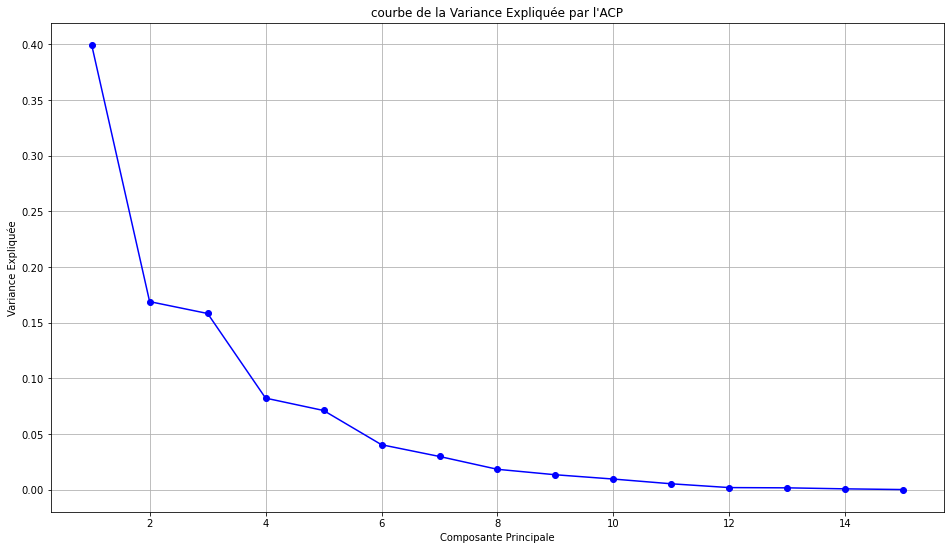

In [12]:
### visualisation de la variance expliquée par l'ACP
plt.figure(figsize=(16,9))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='b')
plt.title('courbe de la Variance Expliquée par l\'ACP')
plt.xlabel('Composante Principale')
plt.ylabel('Variance Expliquée')
plt.grid(True)
plt.show()

#### Conclusion 

Les trois prémières composantes representent plus de 70%  de la variance expliquée 

En plus en regardant la courbe de la variance expliquée on peut observer qu'il y'a un premier plateau au niveau des CP 2 et 3 puis un 2nd plateau au niveau des CP 4 et 5.

On peut de manière générale garder 5 composantes principale qui vont resumer l'essentiel de l'informatioin non bruité.

Mais dans notre étude on va faire un focus sur les 3 prémières composantes comme le sugère l'exercice

### 3 visulaisons les résultats de l'ACP 

#### 3-1 Visualisons les cartes factorielles (CP 1-2; CP1-3)

In [13]:
import matplotlib.pyplot as plt

def plot_acp_individuals(score, plan_indices, individual_names, class_labels, explained_variance):
    """
    Affiche la carte factorielle des individus d'une ACP.

    Args:
        score (array): Les scores (coordonnées des individus) de l'ACP.
        plan_indices (tuple): Les indices des composantes principales à afficher (par exemple, (0, 1) pour le plan 2D).
        individual_names (array): Les noms des individus (ou labels).
        class_labels (array): Les classes à utiliser pour colorier les individus.
        explained_variance (array): La variance expliquée par chaque composante principale de l'ACP.
    """

    # Extraire les indices des composantes principales à afficher
    component1_index, component2_index = plan_indices

    # Plotter la carte factorielle des individus
    plt.figure(figsize=(16, 9))
    for label in set(class_labels):
        mask = (class_labels == label)
        plt.scatter(score[mask, component1_index], score[mask, component2_index], label=label)

    # Ajouter des labels aux points
    for i, name in enumerate(individual_names):
        plt.annotate(name, (score[i, component1_index], score[i, component2_index]))

    # Afficher la variance expliquée par chaque composante dans le titre du graphique
    plt.title('Carte Factorielle des Individus\n' + '\n'.join([f'Composante {i+1}: {explained_variance[i]:.2%}' for i in plan_indices]))
    plt.xlabel(f'Composante Principale {component1_index + 1}')
    plt.ylabel(f'Composante Principale {component2_index + 1}')
    plt.legend()
    plt.grid(True,axis='both')
    plt.show()

# Exemple d'utilisation de la fonction
# Vous devez fournir les données appropriées pour score, plan_indices, individual_names, class_labels et explained_variance.
# plot_acp_individuals(score, (0, 1), individual_names, class_labels, explained_variance)


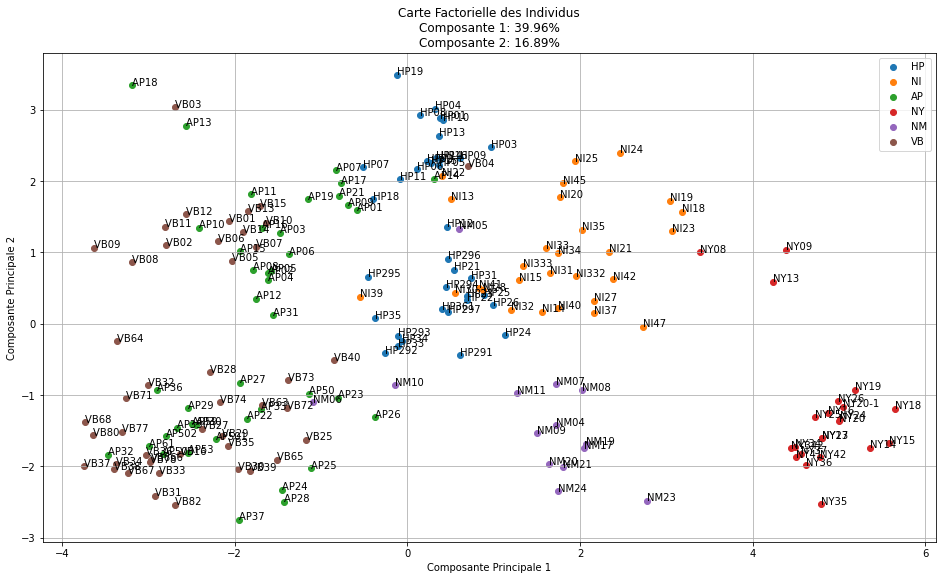

In [14]:
plot_acp_individuals(score=score, plan_indices=(0,1), individual_names=origines['nom'], class_labels= origines['origine'], explained_variance = explained_variance)

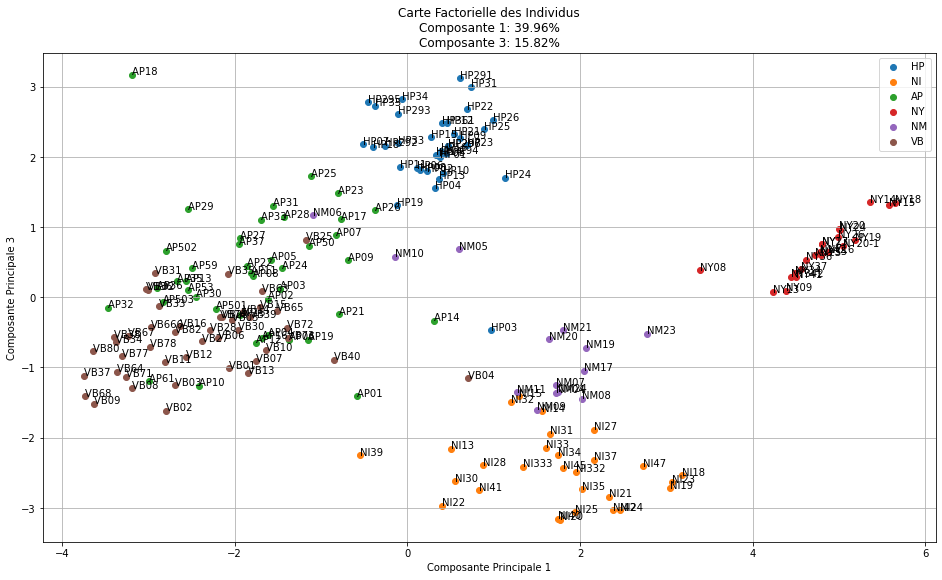

In [15]:
plot_acp_individuals(score=score, plan_indices=(0,2), individual_names=origines['nom'], class_labels= origines['origine'], explained_variance = explained_variance)

In [21]:
def plot_correlation_circle(pca, plan_indices, labels=None, var_explained=None):
    """
    Trace le cercle de corrélation des variables pour une ACP.

    Args:
        pca (PCA): Objet ACP préalablement ajusté aux données.
        plan_indices (tuple): Les indices des composantes principales à afficher (par exemple, (0, 1) pour le plan 2D).
        labels (list): Les labels des variables (noms des colonnes) pour les afficher sur le cercle de corrélation (facultatif).
        var_explained (array): La variance expliquée par chaque composante principale de l'ACP (facultatif).
    """
    component1_index, component2_index = plan_indices

    # Obtenir les coordonnées des variables dans le plan principal
    coord = pca.components_.T

    # Tracer le cercle de corrélation
    fig, ax = plt.subplots(figsize=(16, 16))
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.grid(color='gray', linestyle='--', linewidth=0.5)

    # Afficher les noms des variables (facultatif)
    if labels is not None:
        for i, label in enumerate(labels):
            plt.scatter(coord[i, component1_index], coord[i, component2_index])
            ax.annotate(label, (coord[i, component1_index], coord[i, component2_index]))
    # Afficher la variance expliquée (facultatif)
    if var_explained is not None:
        ax.set_title('Cercle de Corrélation\n' + f'Composante {component1_index + 1}: {var_explained[component1_index]:.2%}, Composante {component2_index + 1}: {var_explained[component2_index]:.2%}')
    else:
        ax.set_title('Cercle de Corrélation')
    # Tracer le cercle
    circle = plt.Circle((0, 0), 1, fill=False, color='b', linestyle='dotted')
    ax.add_artist(circle)

    plt.xlabel(f'Composante Principale {component1_index + 1}')
    plt.ylabel(f'Composante Principale {component2_index + 1}')
    plt.show()

# Exemple d'utilisation de la fonction
# Vous devez fournir un objet PCA préalablement ajusté (pca).
# plot_correlation_circle(pca, (0, 1), labels=['Variable1', 'Variable2', 'Variable3'])


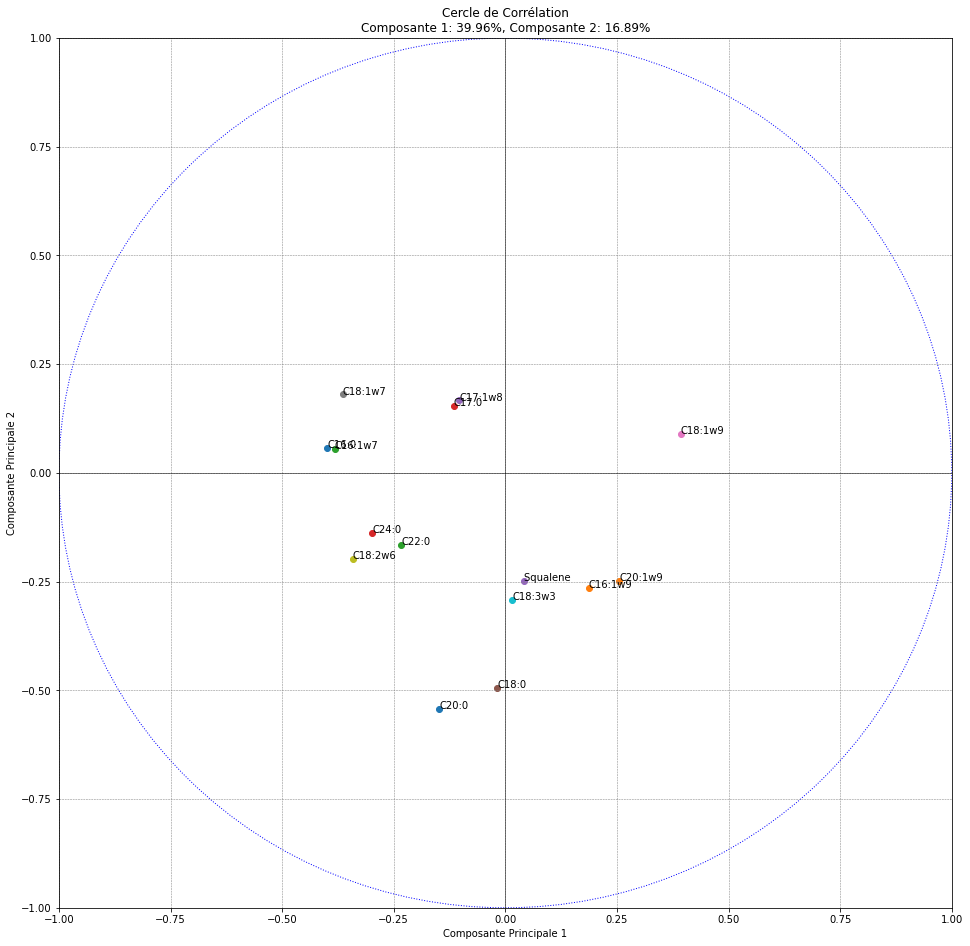

In [22]:
noms_variables = list( analyses_bioch_standard.columns)
noms_variables
plot_correlation_circle(pca=pca , plan_indices=(0,1), labels = noms_variables,var_explained=explained_variance)

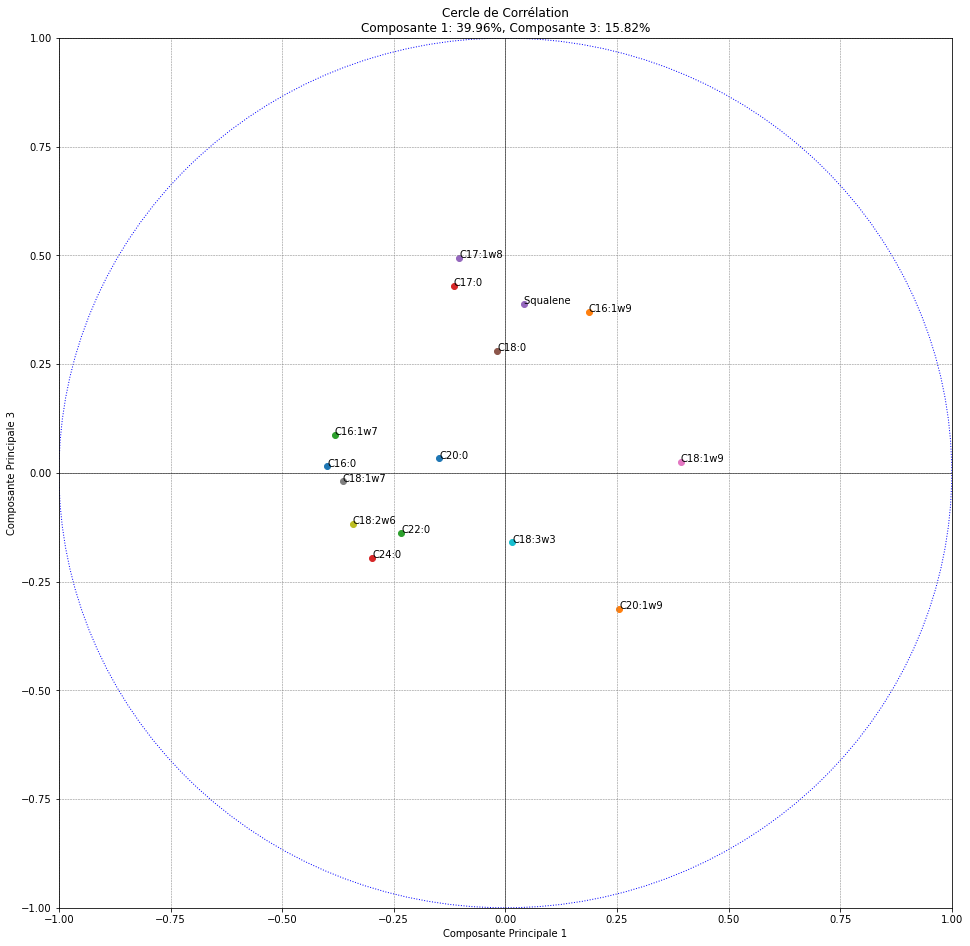

In [23]:
plot_correlation_circle(pca=pca , plan_indices=(0,2), labels = noms_variables,var_explained=explained_variance)